## Importing Libraries

In [1]:
import time,datetime
import pandas as pd
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection, preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Exploring Dataset

In [3]:
df = pd.read_csv('datasets/titanic_train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

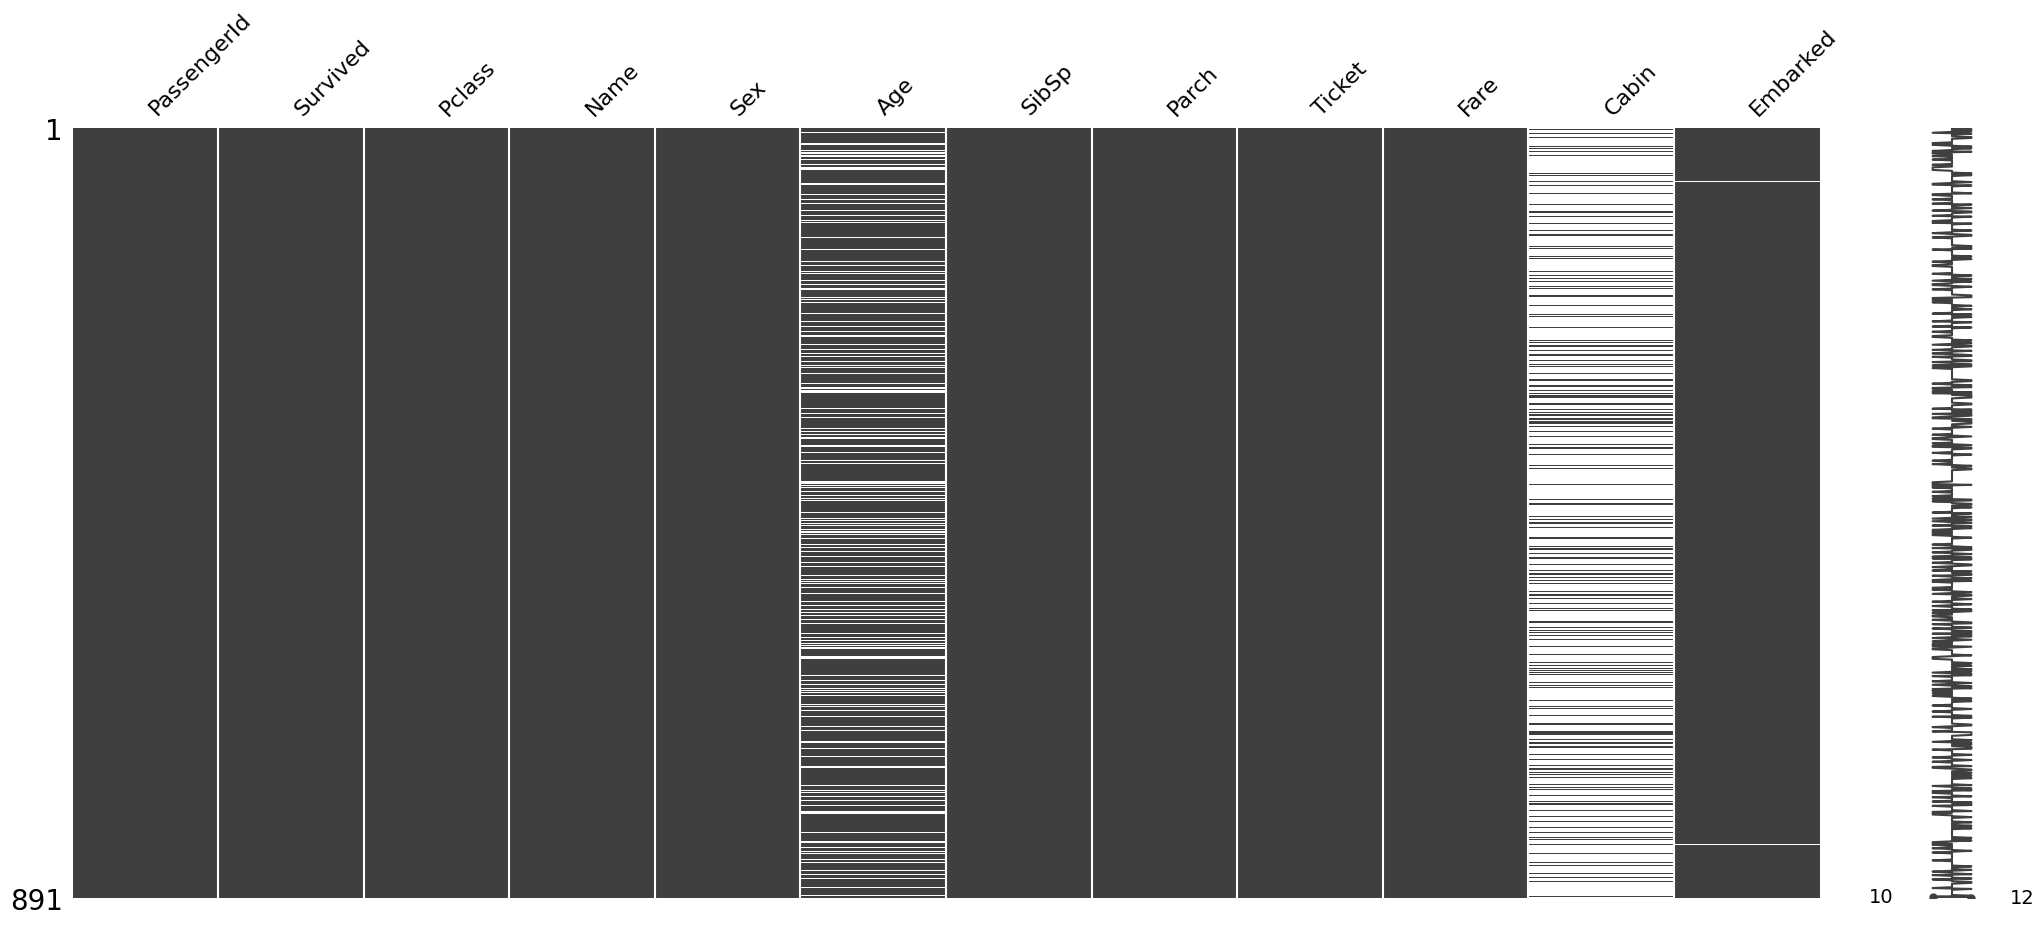

In [7]:
missingno.matrix(df,figsize=(25,10))

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Creating two dataframes for continous and discrete variables

In [9]:
df_bin = pd.DataFrame() # for discretised continous variables(bins/buckets)
df_con = pd.DataFrame() # for continous variables

## Exploring each features individually

### Survived

In [10]:
survived = (df['Survived'] == 1)
survival_percentage = (len(df.loc[survived])/len(df['Survived']))*100
died = (df['Survived'] == 0)
death_percentage = (len(df.loc[died])/len(df['Survived']))*100
print(f'Survival Percentage on Titanic:{survival_percentage:.2f}')
print(f'Death Percentage on Titanic:{death_percentage:.2f}')

Survival Percentage on Titanic:38.38
Death Percentage on Titanic:61.62


Survived
0    549
1    342
Name: count, dtype: int64

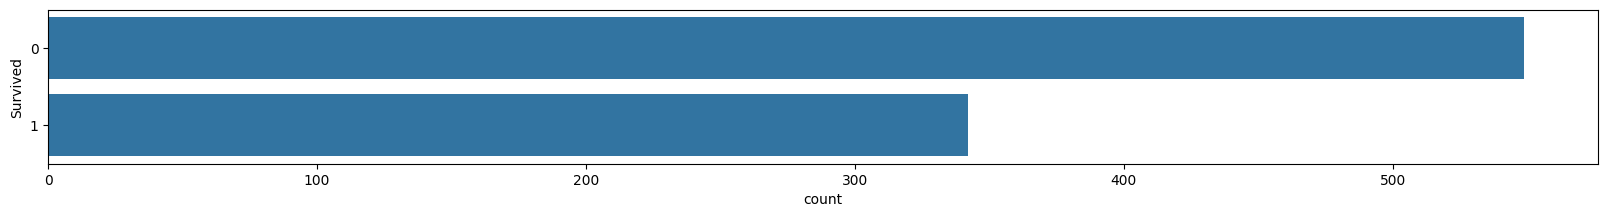

In [11]:
#Exploring Survived Column
fig = plt.figure(figsize=(20,2))
sns.countplot(y='Survived',data=df)
df['Survived'].value_counts()

In [12]:
#Adding them to new df
df_bin['Survived'] = df['Survived']
df_con['Survived'] = df['Survived']

### Pclass

In [13]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [14]:
#Adding them to new df
df_bin['Pclass'] = df['Pclass']
df_con['Pclass'] = df['Pclass']

<Axes: xlabel='Pclass', ylabel='Density'>

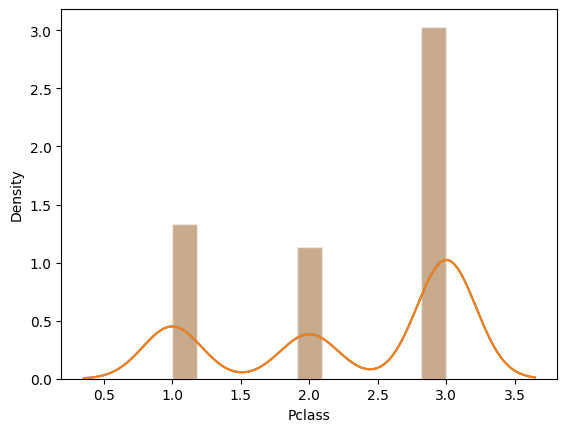

In [15]:
sns.histplot(df_bin['Pclass'],kde=True,stat='density',kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))
sns.histplot(df_bin['Pclass'],kde=True,stat='density',kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))

#Using distplot 
#sns.distplot(df['Pclass'])
#sns.distplot(df['Pclass'])

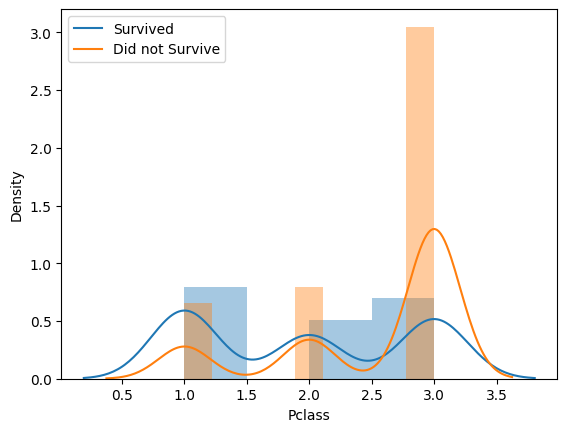

In [16]:
sns.distplot(df_bin[(df_bin['Survived'] == 1)]['Pclass'],kde_kws={'label':'Survived'})
sns.distplot(df_bin[(df_bin['Survived'] == 0)]['Pclass'],kde_kws={'label':'Did not Survive'})
plt.legend()

### Sex

<Axes: xlabel='count', ylabel='Sex'>

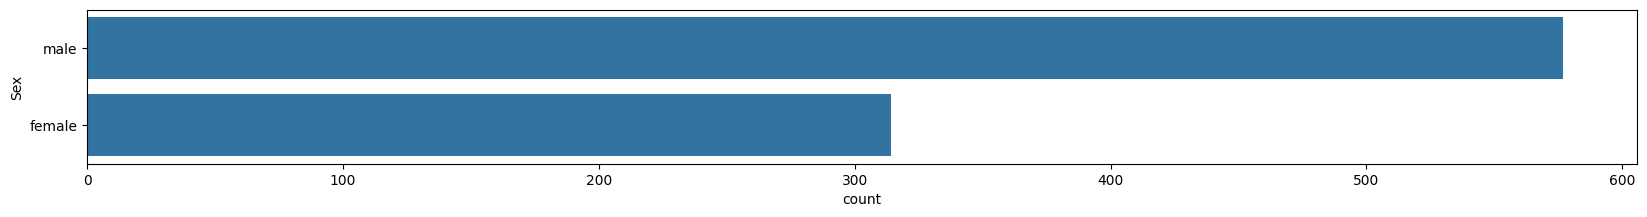

In [17]:
#Exploring Sex
plt.figure(figsize=(20,2))
sns.countplot(y='Sex',data=df)

In [18]:
male = (df['Sex'] == 'male')
male_percentage = (len(df.loc[male])/len(df['Sex']))*100
female = (df['Sex'] == 'female')
female_percentage = (len(df.loc[female])/len(df['Sex']))*100
print(f'Male Percentage on Titanic:{male_percentage:.2f}')
print(f'Female Percentage on Titanic:{female_percentage:.2f}')

Male Percentage on Titanic:64.76
Female Percentage on Titanic:35.24


In [19]:
#Add sex to dataset
df_bin['Sex'] = df['Sex']
df_bin['Sex'] = np.where(df_bin['Sex']=='female',1,0)

df_con["Sex"] = df['Sex']

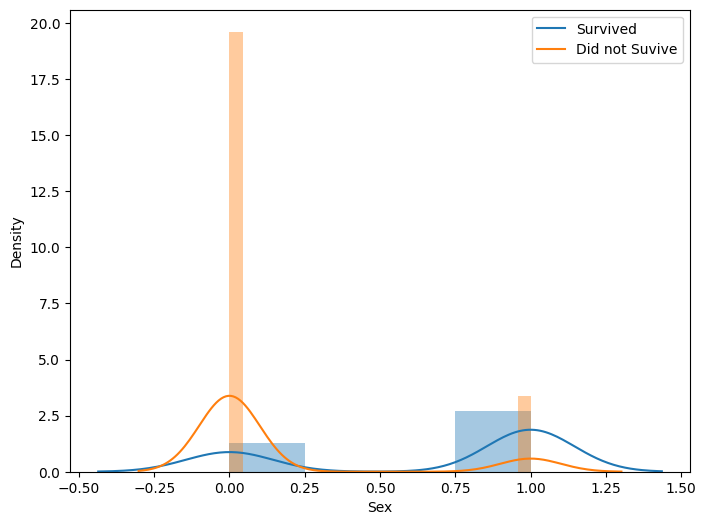

In [20]:
#How does Sex variable compare with Survival
#We can see this because they are both bianary
fig = plt.figure(figsize=(8, 6))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'],kde_kws={'label':'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Sex'],kde_kws={'label':'Did not Suvive'})
plt.legend()

### Age
Not using Age as it has a lot of missing values

In [21]:
#Exploring Age
print(df.Age.isnull().sum())

177


### SibSp

In [22]:
#Exploring SibSp
df['SibSp'].isna().sum()

np.int64(0)

In [23]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [24]:
#Adding number of sibling numbers to dataset
df_bin['SibSp'] = df['SibSp']
df_con['SibSp'] = df['SibSp']

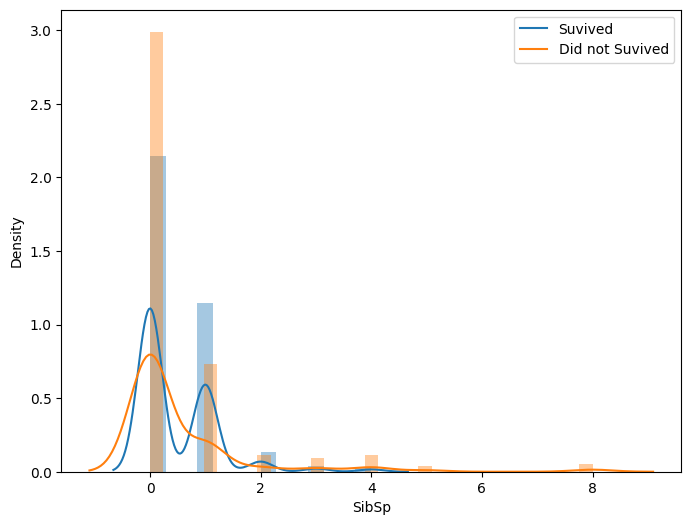

In [25]:
#How does SibSp variable compare with Survival
fig = plt.figure(figsize=(8, 6))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['SibSp'],kde_kws={'label':'Suvived'});
sns.distplot(df_bin.loc[df_bin['Survived']==0]['SibSp'],kde_kws={'label':'Did not Suvived'});
plt.legend()

### Parch

In [26]:
#Exploring Parch
df['Parch'].isna().sum()

np.int64(0)

In [27]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [28]:
#Adding number of sibling numbers to dataset
df_bin['Parch'] = df['Parch']
df_con['Parch'] = df['Parch']

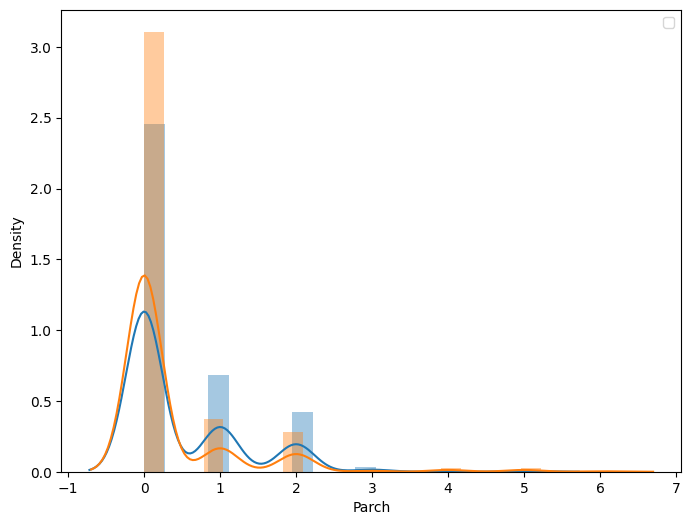

In [29]:
#How does Parch compare to Survival
fig = plt.figure(figsize=(8,6))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Parch'])
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Parch'])
plt.legend()

### Ticket
Not using Ticket as there are a lot of different values

In [30]:
#Exploring Ticket
df['Ticket'].isna().sum()

np.int64(0)

In [31]:
df['Ticket'].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

### Fare

In [32]:
#Exploring Fare
df['Fare'].isna().sum()

np.int64(0)

In [33]:
df['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64

In [34]:
#adding Fare to dataset
df_bin['Fare'] = pd.cut(df['Fare'],bins=5,labels=list(range(1,6)))
df_con['Fare'] = df['Fare']

<Axes: >

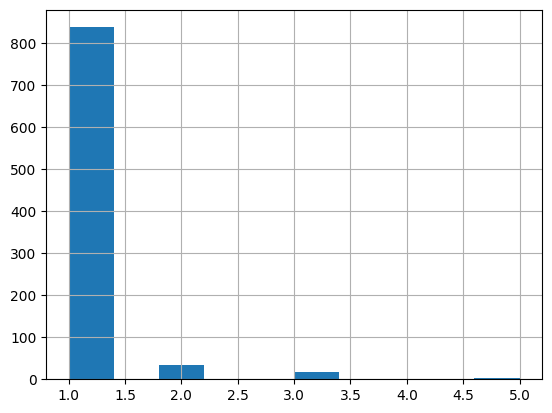

In [35]:
df_bin['Fare'].hist()

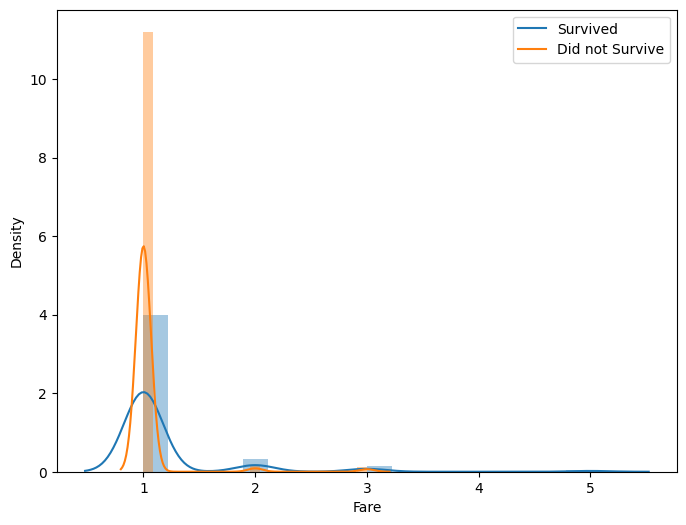

In [36]:
#How does Fare corelate with Survived
fig = plt.figure(figsize=(8,6))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Fare'],kde_kws={'label':'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Fare'],kde_kws={'label':'Did not Survive'})
plt.legend()

### Embarked

In [37]:
#Exploring Embarked
df['Embarked'].isna().sum()

np.int64(2)

In [38]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [39]:
#Adding Embarked into dataset
df_bin['Embarked'] = df['Embarked']
df_con['Embarked'] = df['Embarked']

In [40]:
print(len(df_bin.Embarked))
print(len(df_con.Embarked))
df_bin = df_bin.dropna(subset=['Embarked'])
df_con = df_con.dropna(subset=['Embarked'])
print(len(df_bin.Embarked))
print(len(df_con.Embarked))

891
891
889
889


### Reviewing Dataframes

In [41]:
df_bin

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,1,S
1,1,1,1,1,0,1,C
2,1,3,1,0,0,1,S
3,1,1,1,1,0,1,S
4,0,3,0,0,0,1,S
...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,S
887,1,1,1,0,0,1,S
888,0,3,1,1,2,1,S
889,1,1,0,0,0,1,C


In [42]:
df_con

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S
887,1,1,female,0,0,30.0000,S
888,0,3,female,1,2,23.4500,S
889,1,1,male,0,0,30.0000,C


### Feature Encoding
Encoding `df_bin`(binned dataframe) with one-hot encoding and `df_con`(continous dataframe) with label encoding

In [43]:
#OneHotEncoding
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin,columns=one_hot_cols,dtype=int)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [44]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [45]:
one_hot_cols_con = df_con.columns.tolist()
items_to_remove = {'Survived','SibSp','Parch','Fare'}
one_hot_cols_con = list(set(one_hot_cols_con)-items_to_remove)

df_con_enc = pd.get_dummies(df_con,columns=one_hot_cols_con,dtype=int)
df_con_enc.head()

,Survived,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,1,0,53.1000,0,0,1,1,0,0,1,0
4,0,0,0,8.0500,0,0,1,0,0,1,0,1


**Now Let's Start Building Models**

In [46]:
selected_df = df_con_enc

In [47]:
selected_df

,Survived,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,1,0,53.1000,0,0,1,1,0,0,1,0
4,0,0,0,8.0500,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,13.0000,0,0,1,0,1,0,0,1
887,1,0,0,30.0000,0,0,1,1,0,0,1,0
888,0,1,2,23.4500,0,0,1,0,0,1,1,0
889,1,0,0,30.0000,1,0,0,1,0,0,0,1


In [48]:
x_train = selected_df.drop('Survived',axis=1)
y_train = selected_df.Survived

In [49]:
x_train

,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,0,71.2833,1,0,0,1,0,0,1,0
2,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,0,53.1000,0,0,1,1,0,0,1,0
4,0,0,8.0500,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,0,0,1,0,1,0,0,1
887,0,0,30.0000,0,0,1,1,0,0,1,0
888,1,2,23.4500,0,0,1,0,0,1,1,0
889,0,0,30.0000,1,0,0,1,0,0,0,1


In [50]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [51]:
def fit_ml_algo(algo,x_train,y_train,cv):
    model = algo.fit(x_train,y_train)
    #Accuracy of model
    accuracy = round(model.score(x_train,y_train)*100,2)
    
    #Cross Validation
    train_pred = model_selection.cross_val_predict(algo,x_train,y_train,cv=cv,n_jobs=-1)
    #Cross Validation metric
    cv_accuracy = round(metrics.accuracy_score(y_train,train_pred)*100,2)
    
    return train_pred,accuracy,cv_accuracy

In [52]:
#Logistic Regression
start_time = time.time()
train_pred_log,acc_log,cv_acc_log = fit_ml_algo(LogisticRegression(),x_train,y_train,10)
log_time = (time.time() - start_time)
print("Accuracy:{}".format(acc_log))
print("Cross Validation Accuracy:{}".format(cv_acc_log))
print("Runtime:{}".format(datetime.timedelta(seconds=log_time)))

Accuracy:79.98
Cross Validation Accuracy:79.42
Runtime:0:00:02.216090


In [53]:
#LinearSVC
start_time = time.time()
train_pred_log,acc_log,cv_acc_log = fit_ml_algo(LinearSVC(C=1,loss='hinge'),x_train,y_train,10)
log_time = (time.time() - start_time)
print("Accuracy:{}".format(acc_log))
print("Cross Validation Accuracy:{}".format(cv_acc_log))
print("Runtime:{}".format(datetime.timedelta(seconds=log_time)))

Accuracy:78.18
Cross Validation Accuracy:78.29
Runtime:0:00:01.297149


In [54]:
#Polynomial Kernel SVM
start_time = time.time()
train_pred_log,acc_log,cv_acc_log = fit_ml_algo(SVC(kernel='poly',degree=3,coef0=1,C=5),x_train,y_train,10)
log_time = (time.time() - start_time)
print("Accuracy:{}".format(acc_log))
print("Cross Validation Accuracy:{}".format(cv_acc_log))
print("Runtime:{}".format(datetime.timedelta(seconds=log_time)))

Accuracy:77.5
Cross Validation Accuracy:75.93
Runtime:0:00:00.120788


In [55]:
#GridSearchCV for SVM
#param_grid = [{'kernel':['linear'],'C':list(np.arange(1,100))}]
#grid_search = GridSearchCV(SVC(),param_grid)
#grid_search.fit(x_train,y_train)

In [56]:
#grid_search.best_estimator_

In [57]:
#start_time = time.time()
#train_pred_log,acc_log,cv_acc_log = fit_ml_algo(SVC(C=4,kernel='linear'),x_train,y_train,10)
#log_time = (time.time() - start_time)
#print("Accuracy:{}".format(acc_log))
#print("Cross Validation Accuracy:{}".format(cv_acc_log))
#print("Runtime:{}".format(datetime.timedelta(seconds=log_time)))

In [58]:
#param_grid = [{'kernel':['poly'],'C':list(np.arange(1,100)),'degree':list(np.arange(1,100)),'gamma':list(np.arange(1,100))}]
#grid_search = GridSearchCV(SVC(),param_grid)
#grid_search.fit(x_train,y_train)